# Data cleaning

In [38]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import matplotlib.pyplot as plt
%matplotlib inline
pd.option_context('mode.use_inf_as_na', True)

In [39]:
# Setting fullsize display for pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [40]:
#import data
train = pd.read_csv("train.csv")
#drop id column, which is irrelevant
train.drop(labels = "Id", inplace = True, axis = 1)

In [41]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
train.shape

(1460, 80)

In [43]:
train.dtypes.sort_values()

MSSubClass         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
BsmtFinSF2         int64
BsmtFinSF1         int64
SalePrice          int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
LotFrontage      float64
MasVnrArea       float64
GarageYrBlt      float64
BsmtQual          object
GarageFinish      object
Neighborhood      object


In [44]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [46]:
#Check null values
train.isnull().sum().sort_values()

MSSubClass          0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1

In [47]:
#fill categorical missing values with "None"
for column in ('PoolQC', 'MiscFeature', 'Alley', 'Fence','MasVnrType','FireplaceQu','GarageType','GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','GarageYrBlt'):
    train[column] = train[column].fillna('None')

In [48]:
# Selecting rows where 'MasVnrArea' is null and displaying 'MasVnrArea' and 'MasVnrType' columns
train[train['MasVnrArea'].isnull()][['MasVnrArea', 'MasVnrType']]
#We can observe that MasVnrArea is null only when MasVNrType is "None"

,MasVnrArea,MasVnrType
234,NaN,None
529,NaN,None
650,NaN,None
936,NaN,None
973,NaN,None
977,NaN,None
1243,NaN,None
1278,NaN,None


In [49]:
#Drop null Electrical  (1 row)
train = train.drop(train[train["Electrical"].isnull()].index)
#Replace null value in MasVnrArea with 0
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
#Replace LotFrontage with neighborhood average LotFrontage
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x : x.mean())

In [50]:
#Check null values again
train.isnull().sum().sort_values()

MSSubClass       0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
GarageYrBlt      0
BedroomAbvGr     0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
HalfBath         0
Electrical       0
GarageFinish     0
GarageArea       0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolQC           0
GarageCars       0
PoolArea         0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
ScreenPorch      0
CentralAir       0
HeatingQC        0
Heating          0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
OverallCond      0
LotConfig        0
LandContour      0
LotShape         0
Alley       

<Axes: >

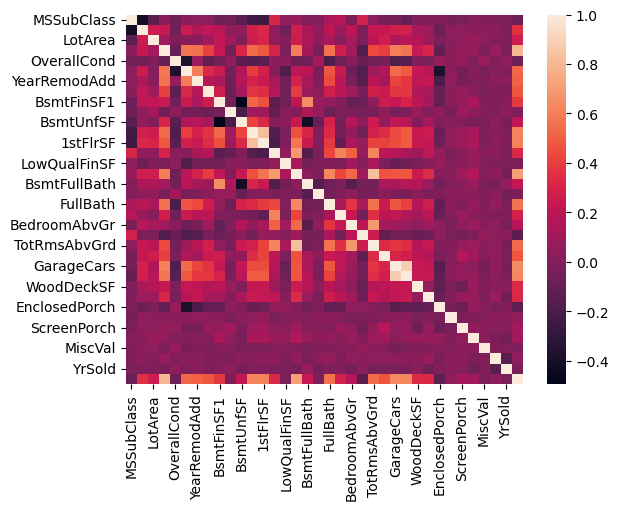

In [51]:
#Heatmap for correlation of data
sns.heatmap(train.select_dtypes(include=['float64','int64']).corr())

In [52]:
#Correlation of variables in the dataset
train.select_dtypes(include=['float64','int64']).corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.411459,-0.139766,0.032936,-0.059134,0.027435,0.040199,0.023792,-0.069501,-0.065549,-0.140627,-0.238160,-0.251484,0.307713,0.046524,0.074949,0.003799,-0.002243,0.131354,0.177004,-0.023502,0.281833,0.040274,-0.045232,-0.040232,-0.098558,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotFrontage,-0.411459,1.000000,0.257654,0.237971,-0.063150,0.257381,0.151294,0.215805,0.204183,0.038764,0.053109,0.280179,0.318059,0.047093,-0.072776,0.266288,0.133424,0.042776,0.203408,0.072260,0.194188,-0.025364,0.231364,0.227980,0.284820,0.279462,0.118652,0.086030,-0.069717,0.040247,0.037600,0.035588,0.020684,0.024832,-0.011607,0.352445
LotArea,-0.139766,0.257654,1.000000,0.105786,-0.005665,0.014296,0.013852,0.103302,0.214121,0.111158,-0.002641,0.260962,0.299533,0.051030,0.004773,0.263109,0.158147,0.048034,0.126100,0.014333,0.119700,-0.017796,0.190037,0.271398,0.154893,0.180392,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,0.032936,0.237971,0.105786,1.000000,-0.092243,0.573334,0.551605,0.407075,0.239265,-0.059291,0.308018,0.537523,0.475933,0.295969,-0.030502,0.593021,0.110700,-0.040291,0.551267,0.274328,0.101789,-0.184040,0.427720,0.396455,0.600991,0.561980,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,-0.059134,-0.063150,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.125922,-0.046595,0.040132,-0.137008,-0.171796,-0.144646,0.029187,0.025454,-0.079777,-0.055250,0.117749,-0.193929,-0.060371,0.013039,-0.087085,-0.057485,-0.024167,-0.185670,-0.151662,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,0.027435,0.257381,0.014296,0.573334,-0.375780,1.000000,0.592512,0.312227,0.250465,-0.048903,0.149444,0.393159,0.283056,0.009784,-0.183774,0.199286,0.188374,-0.037990,0.467960,0.241923,-0.070813,-0.174715,0.095401,0.148580,0.537866,0.479460,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,0.040199,0.151294,0.013852,0.551605,0.074158,0.592512,1.000000,0.177038,0.129259,-0.067575,0.181520,0.292546,0.241344,0.139607,-0.062356,0.287677,0.120148,-0.012165,0.438733,0.182595,-0.040718,-0.149503,0.191603,0.113360,0.420573,0.372012,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
MasVnrArea,0.023792,0.215805,0.103302,0.407075,-0.125922,0.312227,0.177038,1.000000,0.260989,-0.071453,0.113719,0.359798,0.339605,0.174109,-0.068683,0.388012,0.082718,0.027312,0.273397,0.199713,0.102851,-0.038538,0.279724,0.246747,0.362119,0.370807,0.160026,0.122287,-0.110065,0.019100,0.062151,0.011903,-0.029550,-0.006916,-0.008263,0.472606
BsmtFinSF1,-0.069501,0.204183,0.214121,0.239265,-0.046595,0.250465,0.129259,0.260989,1.000000,-0.050328,-0.495718,0.521963,0.445473,-0.136697,-0.064604,0.208088,0.649025,0.067281,0.059102,0.005085,-0.107281,-0.081175,0.044529,0.259541,0.224342,0.296851,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.065549,0.038764,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.071453,-0.050328,1.000000,-0.209395,0.104593,0.096948,-0.099146,0.014784,-0.009686,0.158557,0.070904,-0.076306,-0.031922,-0.015696,-0.040795,-0.035170,0.046748,-0.038204,-0.018295,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412


In [53]:
# Create dummy variables for categorical data
train = pd.get_dummies(train, drop_first = True, dtype=float)

/Users/bocchan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x10000 with 0 Axes>

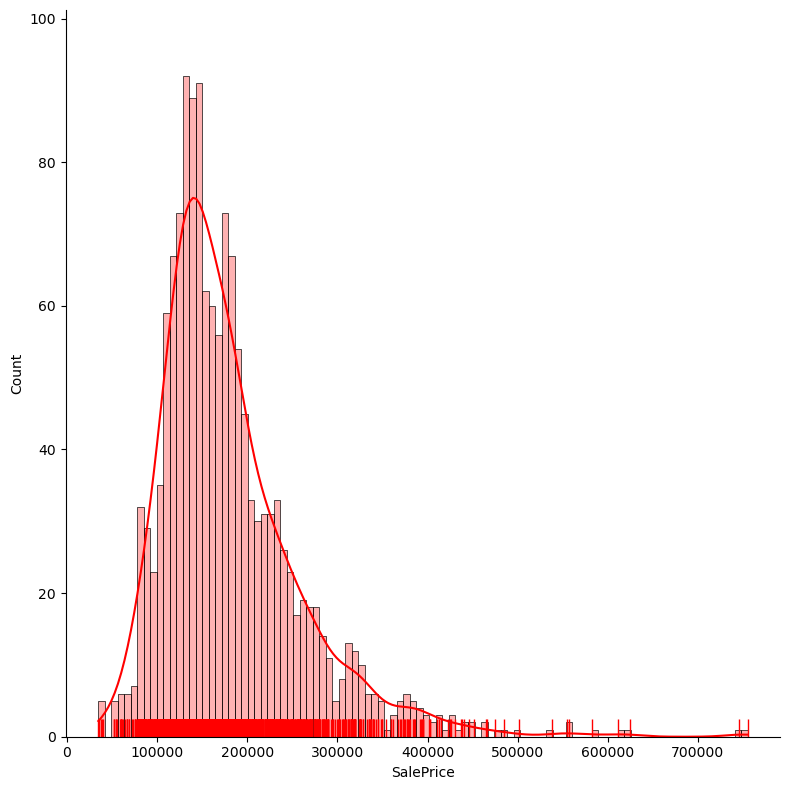

In [54]:
#Check distribution of sale price
plt.figure(figsize = (8,100))
sns.displot(data = train["SalePrice"], color ="red", kde = True, bins = 100, rug = True, alpha = 0.3, height = 8)
plt.show()
#The data is right-skewed, which is expected for real estate price

# Multiple Regression Model

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Split training & testing data
X = train.drop(["SalePrice"], axis = 1)
y = train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [56]:
#Fit the model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [57]:
#Model coefficient
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MSSubClass,-2.345863e+01
LotFrontage,1.228865e+01
LotArea,6.947678e-01
OverallQual,7.601003e+03
OverallCond,5.184531e+03
YearBuilt,3.547232e+02
YearRemodAdd,4.007631e+01
MasVnrArea,3.261584e+01
BsmtFinSF1,1.411285e+01
BsmtFinSF2,9.341950e-01


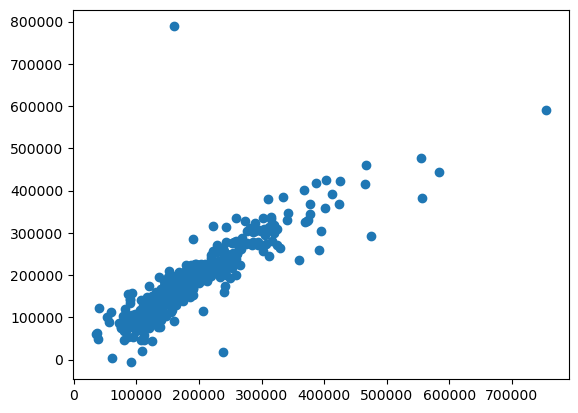

In [58]:
#Predictions
predictions = lm.predict(X_test)
#Visualization of actual vs predicted data
plt.scatter(y_test,predictions)

/Users/bocchan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


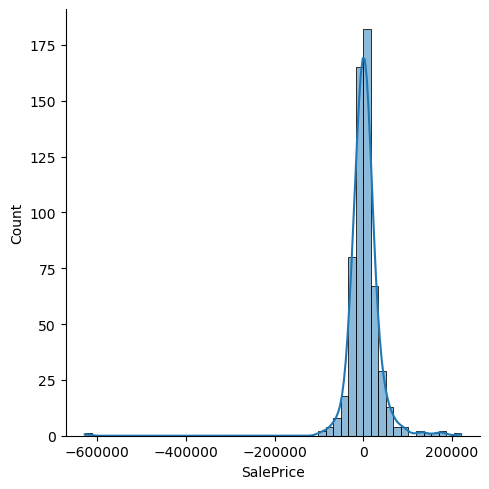

In [59]:
# Distribution of residuals
sns.displot((y_test-predictions),bins=50, kde =True);

In [60]:
# Accuracy assessment
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20970.463210997405
MSE: 1626763998.7919686
RMSE: 40333.16251909796


# Random Foress Model

In [61]:
from sklearn.ensemble import RandomForestClassifier
# Model fitting
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
# Model prediction
rfc_pred = rfc.predict(X_test)

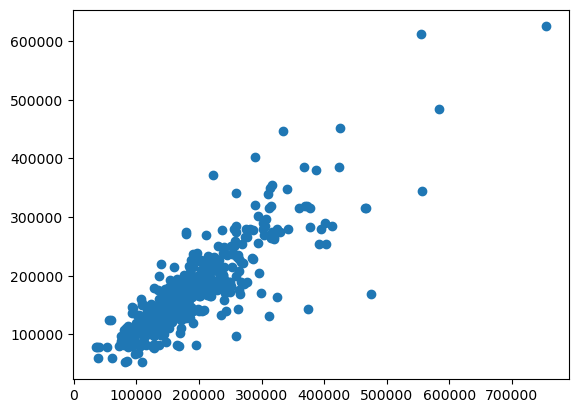

In [63]:
plt.scatter(y_test,rfc_pred)

In [64]:
# Accuracy assessment
print('MAE:', metrics.mean_absolute_error(y_test, rfc_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfc_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))

MAE: 26925.64383561644
MSE: 1795205849.6164384
RMSE: 42369.86959640587


/Users/bocchan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


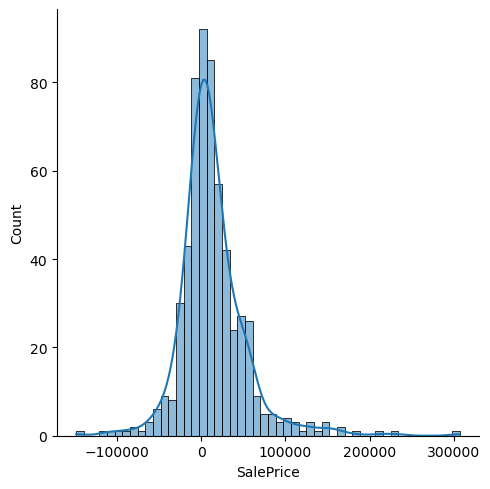

In [65]:
# Distribution of residuals
sns.displot((y_test-rfc_pred),bins=50, kde =True);

# Gradient Boosting 

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

#Fit the model
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

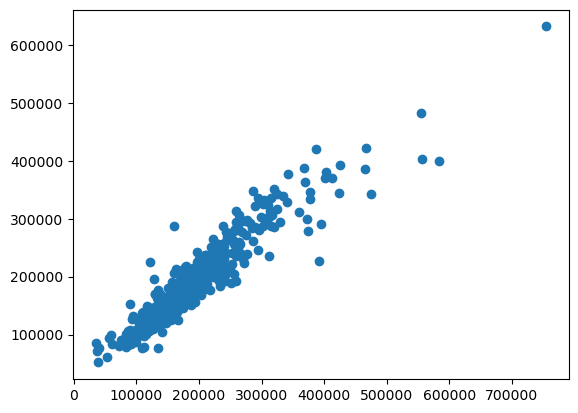

In [67]:
#Model testing 
gb_pred = gb.predict(X_test)

#Plot of actual vs predicted result on test data
plt.scatter(y_test,gb_pred)

In [68]:
#Accuracy measurement
print('MAE:', metrics.mean_absolute_error(y_test, gb_pred))
print('MSE:', metrics.mean_squared_error(y_test, gb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gb_pred)))

MAE: 16786.17855116316
MSE: 693015588.6123817
RMSE: 26325.189241720214


/Users/bocchan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


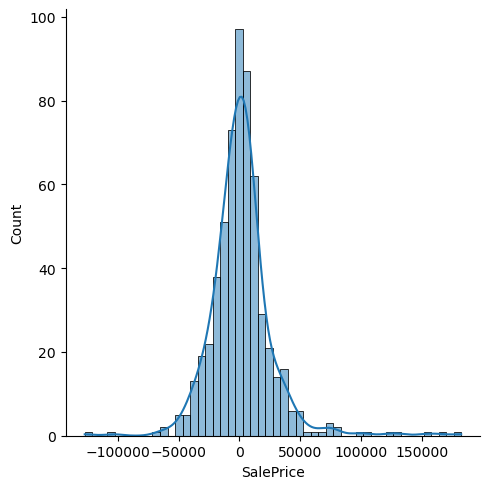

In [69]:
#Distribution of variance
sns.displot((y_test-gb_pred),bins=50, kde= True);

# Conclusion

Among the 3 models tested, it was found that Gradient Boosting showed superior performance overall.

While Multiple Linear Regression demonstrated higher accuracy than Random Forest according to the three metrics evaluated, the visualization of actual versus predicted results indicates that Random Forest has a lower chance for significant deviations from the actual outcomes.